In [13]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-04-07 18:45:17,550: Credentials are already in use. The existing account in the session will be replaced.


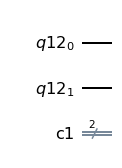

In [14]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2);
circuit = QuantumCircuit(qr,cr);
circuit.draw()
# at this point input is |00>

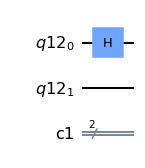

In [15]:
# create superposition of 1st qubit using hadamard gate
circuit.h(qr[0])
circuit.draw()
# now expected superpostion is (|00>+|01>)/sqrt(2)

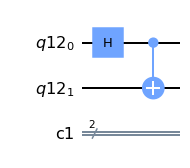

In [16]:
# controled not gate
circuit.cx(qr[0],qr[1])
circuit.draw()

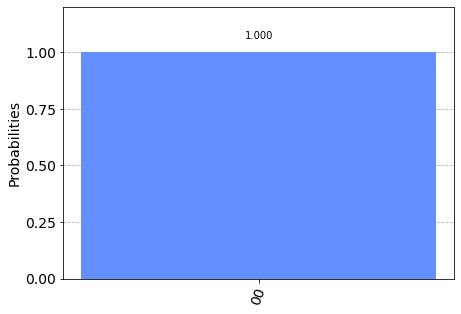

In [17]:
# create simulator
simulator = Aer.get_backend('qasm_simulator')
# run the circuit in simulator
job = execute(circuit, backend = simulator)
result = job.result()
plot_histogram(result.get_counts(circuit))

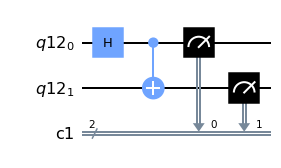

In [18]:
circuit.measure(qr, cr)
circuit.draw()

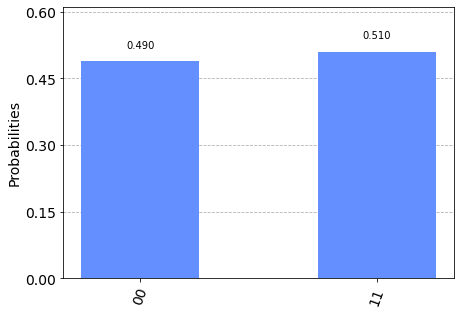

In [19]:
# create simulator
simulator = Aer.get_backend('qasm_simulator')
# run the circuit in simulator
job = execute(circuit, backend = simulator)
result = job.result()
plot_histogram(result.get_counts(circuit))

In [21]:
# get IBMQ provider to run circuit in real Quantum computer
provider = IBMQ. get_provider('ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [22]:
qcomp = provider.get_backend('ibmq_16_melbourne')
qcomp

<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>

In [23]:
job = execute(circuit, backend= qcomp)

In [24]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [25]:
result = job.result()

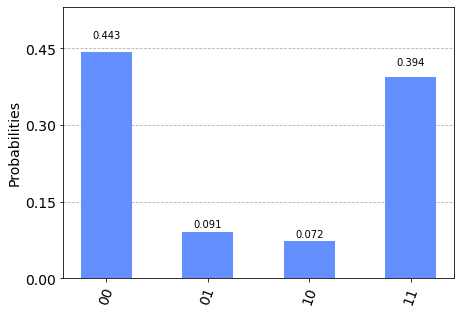

In [26]:
plot_histogram(result.get_counts(circuit))